# Exploratory Data Analysis on FiFA23 official dataset

![Alt text](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F754781%2F9a2ffdb0d55279bd06db95322821ae16%2F5.jpg?generation=1597934332241413&alt=media)
* The FIFA23 OFFICIAL DATASET from [kaggle](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database) contains +17k unique players and more than 60 columns, general information and all KPIs the famous videogame offers. The data set contains:
    * Aggregated data such as name of the players, age, country.
    * Detailed data such as offensive potential, defense, acceleration
* In this notebook we perform simple analysis on FIFA23 dataset , just for the seek of practicing and to have some intuition about teams and players which considered very intersting for those who are crazy about football like me :)



## Note:
* To run this jupyter notebook in your local env sucessfully, please consider this comands first:)
1. python -m venv .venv
2. source .venv/bin/activate  # or activate.ps1 on Windows
3. pip install -r requirements.txt

## Data Preparation and Cleaning


In [83]:
# First we import pandas
import pandas as pd

In [84]:
# We can read the dataset to a data frame object df:
df = pd.read_csv('FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [85]:
# Show the nubmer of rows and columns in our dataset:
df.shape


(17660, 29)

In [86]:
# we can show the first 10 top examples(rows), 5 is the defult :
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos9"">RDM","Jul 1, 2015",NaN,2025,177cm,75kg,€182M,6.0,NaN
6,197445,D. Alaba,30,https://cdn.sofifa.net/players/197/445/23_60.png,Austria,https://cdn.sofifa.net/flags/at.png,86,86,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,...,Yes,"<span class=""pos pos6"">LCB","Jul 1, 2021",NaN,2026,180cm,78kg,€113.8M,4.0,NaN
7,187961,22 Paulinho,32,https://cdn.sofifa.net/players/187/961/22_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,83,83,Al Ahli,https://cdn.sofifa.net/teams/112387/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jul 22, 2021",NaN,2024,183cm,80kg,€48.5M,15.0,NaN
8,208333,E. Can,28,https://cdn.sofifa.net/players/208/333/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82,82,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,...,Yes,"<span class=""pos pos28"">SUB","Feb 18, 2020",NaN,2024,186cm,86kg,€51.9M,23.0,NaN
9,210514,João Cancelo,28,https://cdn.sofifa.net/players/210/514/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,88,88,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos7"">LB","Aug 7, 2019",NaN,2027,182cm,74kg,€152.6M,7.0,NaN


In [87]:
#lets delete some columns that are uneeded such as  'Photo', 'Flag', and 'Club Logo'
del df['Photo']
del df['Flag']
del df['Club Logo']

In [88]:
# lets check if the specified columns deleted
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,2312,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,2305,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,2303,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,2296,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [89]:
#Lets check some information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Nationality               17660 non-null  object 
 4   Overall                   17660 non-null  int64  
 5   Potential                 17660 non-null  int64  
 6   Club                      17449 non-null  object 
 7   Value                     17660 non-null  object 
 8   Wage                      17660 non-null  object 
 9   Special                   17660 non-null  int64  
 10  Preferred Foot            17660 non-null  object 
 11  International Reputation  17660 non-null  float64
 12  Weak Foot                 17660 non-null  float64
 13  Skill Moves               17660 non-null  float64
 14  Work R

* As we can see above, there are some columns such as 'Best Overall Rating' and 'Loaned From' contains many null values.

In [90]:
# Lets check how many null values each column has:
df.isna().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          211
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

In [91]:
# A function to delete the given columns from the df.
def delete_cols(cols):
    for col in cols:
        del df[col]
        print(f' "{col}" column is delete successfully..!!')

In [92]:
# Lets get columns which contain > 250 null values to be deleted 
cols_to_delete = []
number_of_nulls = df.isna().sum().tolist()
all_cols = df.columns
for i in range(len(all_cols)):
    if number_of_nulls[i] > 250:
        cols_to_delete.append(all_cols[i])
print(cols_to_delete)

['Joined', 'Loaned From', 'Contract Valid Until', 'Release Clause', 'Best Overall Rating']


In [93]:
#Lets delete the columns we get above
delete_cols(cols_to_delete)

 "Joined" column is delete successfully..!!
 "Loaned From" column is delete successfully..!!
 "Contract Valid Until" column is delete successfully..!!
 "Release Clause" column is delete successfully..!!
 "Best Overall Rating" column is delete successfully..!!


In [94]:
# Show the data_set after cleaning:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,2312,...,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB",189cm,82kg,8.0
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,2305,...,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM",179cm,69kg,8.0
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,2303,...,2.0,3.0,3.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",172cm,69kg,19.0
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,...,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",181cm,70kg,17.0
4,224232,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,2296,...,3.0,3.0,3.0,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM",172cm,68kg,23.0


## Exploratory Analysis and Visualization

**In** this section we try to show some visulaziation for the data to find out some information about players.


* Let's begin by importing`matplotlib.pyplot` and `seaborn`. 

In [96]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Matplotlib is building the font cache; this may take a moment.


* Lets find some statistical infromation about the data columns:


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17660.0,246319.424462,31487.892861,16.0,240732.5,257041.0,263027.5,271340.0
Age,17660.0,23.127746,4.639821,15.0,20.0,22.0,26.0,54.0
Overall,17660.0,63.369592,8.036268,43.0,58.0,63.0,69.0,91.0
Potential,17660.0,70.981200,6.529836,42.0,67.0,71.0,75.0,95.0
Special,17660.0,1537.915855,285.893809,749.0,1387.0,1548.0,1727.0,2312.0
International Reputation,17660.0,1.106285,0.407021,1.0,1.0,1.0,1.0,5.0
Weak Foot,17660.0,2.900340,0.663523,1.0,3.0,3.0,3.0,5.0
Skill Moves,17660.0,2.297169,0.754264,1.0,2.0,2.0,3.0,5.0
Kit Number,17625.0,25.037957,19.154116,1.0,11.0,22.0,32.0,99.0


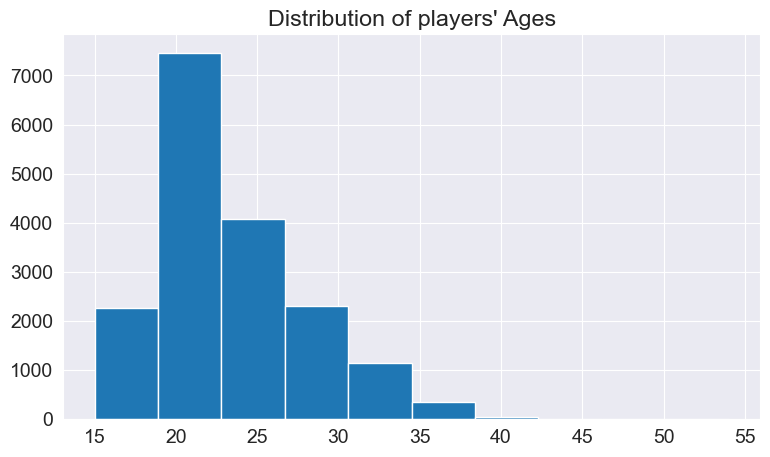

In [98]:
# Lets show the distribution of the players ages:
plt.title("Distribution of players' Ages")
plt.hist(df['Age']);

* As we can see on the graph above that most of players (more than 7000 thousands) are around 20s years old ( it make sense :) ) and we can see taht there are only few players in 40s !!. 

* We can also show the distribution of the players overall attributes


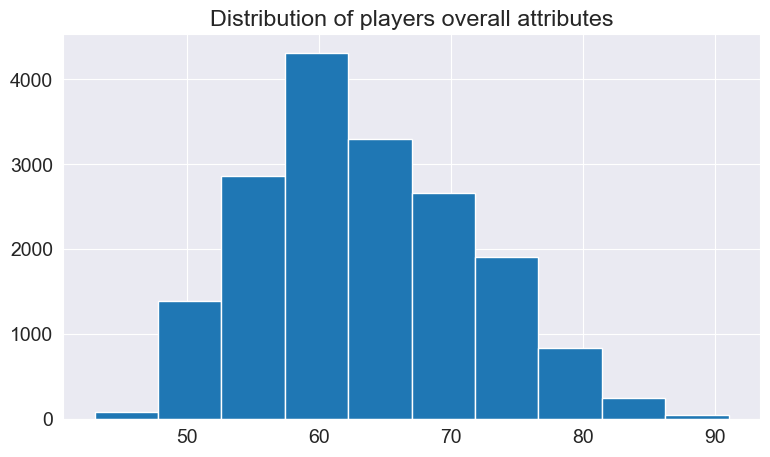

In [99]:
plt.title('Distribution of players overall attributes')
plt.hist(df['Overall']);

* As we can see that there are just few players reach 90% of their overall attributes average and the most are around 60s

* Lets see if there is a relation between the age of player and his overall?

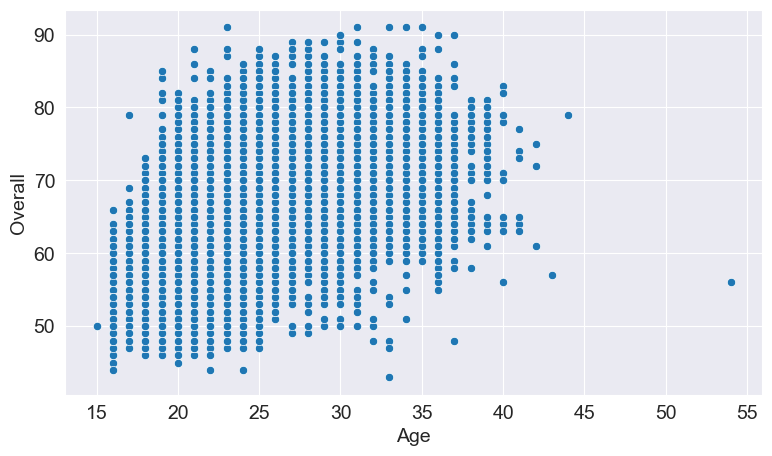

In [100]:
sns.scatterplot(x=df['Age'], y=df['Overall']);

* from the visualization above, we can infer that players whose overall attributes > 90 are between 22 and 35 years old. And players over 40 years old, no one his overall attributes reach 80%

*   lets try to visualize how the average overall  rate varies across the natianality of the first 30 rows in the data. :) 

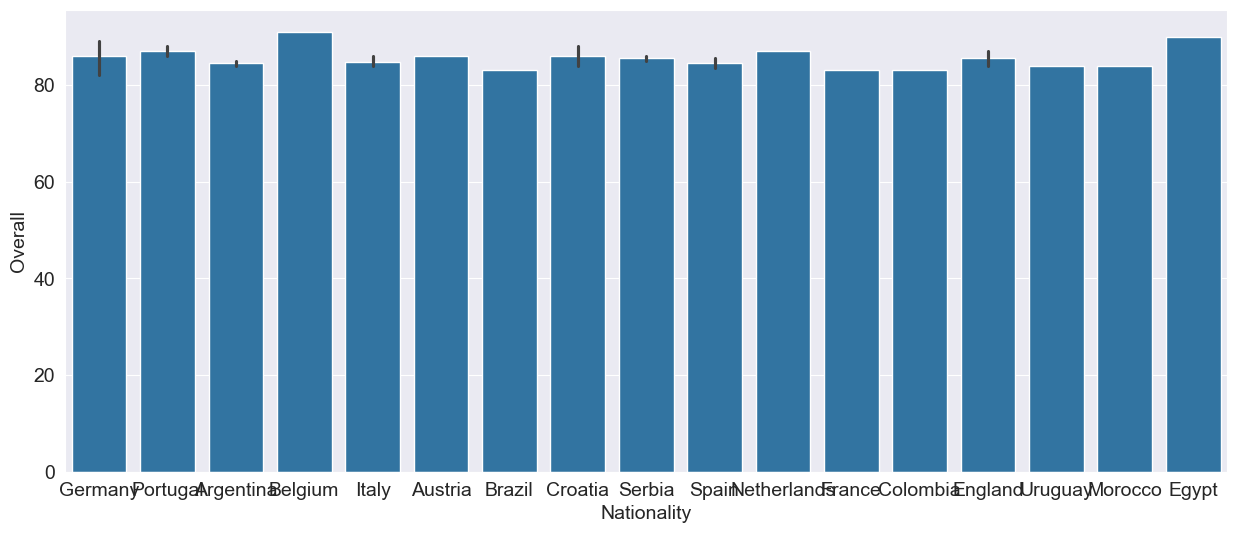

In [101]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Nationality'].head(30), y=df['Overall'].head(30), data=df);

* Does this mean that players with Eygptian nationality have the highest average overall attributes? Lets see how many players per nationality for the first 30 rows of data 

In [102]:
df.head(30)[['Name','Nationality']].groupby('Nationality').count()

,Name
Nationality,
Argentina,2
Austria,1
Belgium,1
Brazil,1
Colombia,1
Croatia,3
Egypt,1
England,2
France,1


* Thus we see how the average overall  rate varies across the natianality of the first 30 rows. And this is biased; because there are different number of players per nationality and because M.Salah (the only player from the 30 row) has overall > 90, the egyption nationlity has the highest overall.

## Answering some quetion about the players and teams

 #### Q1: Show all the players  in Manchester City Club  ?

In [103]:
df[df['Club']=='Manchester City']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,...,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",181cm,70kg,17.0
9,210514,João Cancelo,28,Portugal,88,88,Manchester City,€82.5M,€250K,2262,...,3.0,4.0,4.0,High/ Medium,Unique,Yes,"<span class=""pos pos7"">LB",182cm,74kg,7.0
45,188377,K. Walker,32,England,85,85,Manchester City,€37.5M,€170K,2196,...,3.0,2.0,3.0,High/ High,Unique,Yes,"<span class=""pos pos3"">RB",183cm,83kg,2.0
47,186942,İ. Gündoğan,31,Germany,85,85,Manchester City,€44M,€185K,2195,...,3.0,4.0,4.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos28"">SUB",180cm,80kg,8.0
66,218667,Bernardo Silva,27,Portugal,88,88,Manchester City,€97.5M,€260K,2185,...,2.0,3.0,4.0,High/ High,Lean (170-185),Yes,"<span class=""pos pos15"">LCM",173cm,64kg,20.0
150,231866,Rodri,26,Spain,87,89,Manchester City,€88.5M,€200K,2133,...,3.0,4.0,3.0,Medium/ High,Normal (185+),Yes,"<span class=""pos pos10"">CDM",191cm,82kg,16.0
177,246191,J. Álvarez,22,Argentina,78,86,Manchester City,€32M,€100K,2122,...,1.0,4.0,4.0,High/ High,Normal (170-185),No,"<span class=""pos pos28"">SUB",173cm,71kg,19.0
180,239085,E. Haaland,21,Norway,88,94,Manchester City,€148M,€220K,2120,...,4.0,3.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos25"">ST",195cm,94kg,9.0
219,135507,22 Fernandinho,36,Brazil,81,81,Manchester City,€5M,€86K,2108,...,3.0,4.0,3.0,Medium/ High,Lean (170-185),Yes,"<span class=""pos pos28"">SUB",179cm,67kg,25.0
251,224081,K. Phillips,26,England,81,85,Manchester City,€32M,€120K,2100,...,2.0,3.0,3.0,Medium/ High,Stocky (170-185),Yes,"<span class=""pos pos28"">SUB",178cm,72kg,4.0


#### Q2: Show all  the exist nationalities of the players  in Manchester City Club  ?

In [104]:
df[df['Club']=='Manchester City']['Nationality'].unique()

array(['Belgium', 'Portugal', 'England', 'Germany', 'Spain', 'Argentina',
       'Norway', 'Brazil', 'Algeria', 'France', 'Netherlands', 'Croatia',
       'Burkina Faso', 'Serbia', 'Colombia'], dtype=object)

#### Q3: Who is the Alegerian plyer in Manchester City?

In [105]:
df_mancity = df[df['Club']=='Manchester City']
df_mancity[df_mancity['Nationality'] == 'Algeria']['Name']

391    R. Mahrez
Name: Name, dtype: object

In [106]:
# To retrieve all the row data not only the name
df_mancity[df_mancity['Nationality']=='Algeria']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
391,204485,R. Mahrez,31,Algeria,86,86,Manchester City,€56.5M,€220K,2063,...,3.0,4.0,5.0,Medium/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB",179cm,67kg,26.0


#### Q4: Who is the oldest goalkeeper (GK)?

In [107]:
# Lets have a look at the Position colum first:)
df['Position']

0        <span class="pos pos28">SUB
1        <span class="pos pos15">LCM
2          <span class="pos pos7">LB
3        <span class="pos pos13">RCM
4        <span class="pos pos13">RCM
                    ...             
17655    <span class="pos pos29">RES
17656    <span class="pos pos29">RES
17657    <span class="pos pos29">RES
17658    <span class="pos pos29">RES
17659    <span class="pos pos29">RES
Name: Position, Length: 17660, dtype: object

* As we can see that the column contains messy data.So, we have to clean it and maintain only the desired data/postion such as 'SUB', 'LCM', ...and so on.

In [ ]:
# lets see if there are null values:
df['Position'].isna().sum()

35

In [108]:
# we can now clean the data and take the text after the symbole '>' only as the following:
messy_position = df['Position'].tolist()
clean_position = []

for item in messy_position:
    if type(item)==str:
        clean_position.append(item[item.index('>')+1 : ])
    else:
        clean_position.append(item) # for nan/empty values

#clean_position
    

In [109]:
# lets write the clean data back to the data frame
df['Position']= clean_position
df['Position']

0        SUB
1        LCM
2         LB
3        RCM
4        RCM
        ... 
17655    RES
17656    RES
17657    RES
17658    RES
17659    RES
Name: Position, Length: 17660, dtype: object

* Now lets comeback to our question :) --> Who is the oldest goalkeeper (GK)?

In [110]:
# first lets show all goal keepers:
GK_df= df[df['Position']=='GK']
GK_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
7843,210257,Ederson,28,Brazil,89,91,Manchester City,€88M,€210K,1583,...,3.0,3.0,1.0,Medium/ Medium,Unique,Yes,GK,188cm,86kg,31.0
9151,167495,M. Neuer,36,Germany,90,90,FC Bayern München,€13.5M,€72K,1535,...,5.0,4.0,1.0,Medium/ Medium,Unique,Yes,GK,193cm,93kg,1.0
10076,204935,J. Pickford,28,England,82,84,Everton,€26M,€45K,1503,...,3.0,4.0,1.0,Medium/ Medium,Normal (185+),Yes,GK,185cm,77kg,1.0
10267,215698,M. Maignan,26,France,87,90,AC Milan,€80M,€90K,1496,...,2.0,4.0,1.0,Medium/ Medium,Normal (185+),Yes,GK,191cm,89kg,16.0
10721,174543,C. Bravo,39,Chile,78,78,Real Betis Balompié,€1.6M,€11K,1480,...,3.0,3.0,1.0,Medium/ Medium,Normal (170-185),Yes,GK,184cm,80kg,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,261707,21 Tan Zemin,27,China PR,59,61,Jiangsu FC,€210K,€2K,852,...,1.0,3.0,1.0,Medium/ Medium,Stocky (185+),No,GK,193cm,86kg,1.0
17353,259732,M. Michu,28,India,54,56,NorthEast United FC,€90K,€500,845,...,1.0,2.0,1.0,Medium/ Medium,Lean (170-185),No,GK,177cm,75kg,32.0
17389,269521,Hou Yu,31,China PR,60,60,Meizhou Hakka,€130K,€1K,841,...,1.0,3.0,1.0,Medium/ Medium,Normal (185+),No,GK,192cm,80kg,22.0
17453,269732,R. Ríos Novo,20,Argentina,58,69,Atlanta United,€375K,€650,832,...,1.0,2.0,1.0,Medium/ Medium,Lean (170-185),No,GK,178cm,70kg,34.0


In [113]:
# now we can get the oldest player as the following:
df.iloc[[GK_df['Age'].idxmax()]]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
15375,1179,G. Buffon,44,Italy,79,79,Parma,€1.9M,€3K,1258,...,4.0,2.0,1.0,Medium/ Medium,Normal (185+),Yes,GK,192cm,92kg,1.0


In [114]:
# alternative solution ( directly from the df):
df.iloc[df[df['Position']=='GK']['Age'].idxmax()]

ID                                    1179
Name                             G. Buffon
Age                                     44
Nationality                          Italy
Overall                                 79
Potential                               79
Club                                 Parma
Value                                €1.9M
Wage                                   €3K
Special                               1258
Preferred Foot                       Right
International Reputation               4.0
Weak Foot                              2.0
Skill Moves                            1.0
Work Rate                   Medium/ Medium
Body Type                    Normal (185+)
Real Face                              Yes
Position                                GK
Height                               192cm
Weight                                92kg
Kit Number                             1.0
Name: 15375, dtype: object

In [115]:
# The same above( directly from the df) but as a dataframe row:
df.iloc[df[df['Position']=='GK'][['Age']].idxmax()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
15375,1179,G. Buffon,44,Italy,79,79,Parma,€1.9M,€3K,1258,...,4.0,2.0,1.0,Medium/ Medium,Normal (185+),Yes,GK,192cm,92kg,1.0


In [116]:
# The same above but as data frame :) 
df.iloc[[df[df['Position']=='GK']['Age'].idxmax()]]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
15375,1179,G. Buffon,44,Italy,79,79,Parma,€1.9M,€3K,1258,...,4.0,2.0,1.0,Medium/ Medium,Normal (185+),Yes,GK,192cm,92kg,1.0


In [117]:
# Alternative solution without using iloc method :)
GK_df[GK_df['Age']==GK_df['Age'].max()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
15375,1179,G. Buffon,44,Italy,79,79,Parma,€1.9M,€3K,1258,...,4.0,2.0,1.0,Medium/ Medium,Normal (185+),Yes,GK,192cm,92kg,1.0


#### Q5: Which is the team with the lowest average age?

In [118]:
# lets groub the data by club and calcualte the average/mean for the age column for each team/club:
df.groupby('Club')['Age'].mean()

Club
1. FC Heidenheim 1846        21.666667
1. FC Kaiserslautern         24.263158
1. FC Köln                   23.478261
1. FC Magdeburg              21.521739
1. FC Nürnberg               21.588235
                               ...    
İstanbul Başakşehir FK       26.090909
İstanbulspor                 23.500000
İttifak Holding Konyaspor    25.357143
ŁKS Łódź                     22.500000
Śląsk Wrocław                21.687500
Name: Age, Length: 926, dtype: float64

In [119]:
# Now we can get the the team that has the lowest average age :)
df.groupby('Club')['Age'].mean().idxmin()

'Chemnitzer FC'

In [120]:
# Alternative solution
g_ser= df.groupby('Club')['Age'].mean()
g_ser[g_ser==g_ser.min()]

Club
Chemnitzer FC    16.0
Name: Age, dtype: float64

#### Q6:  Who are the top 10  players based on their Overall and  their Potential? 

In [121]:
df.sort_values(by=['Overall','Potential'], ascending=False)[:10]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number
75,231747,K. Mbappé,23,France,91,95,Paris Saint-Germain,€190.5M,€230K,2177,...,4.0,4.0,5.0,High/ Low,Unique,Yes,ST,182cm,73kg,7.0
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,...,4.0,5.0,4.0,High/ High,Unique,Yes,RCM,181cm,70kg,17.0
41,188545,R. Lewandowski,33,Poland,91,91,FC Barcelona,€84M,€420K,2205,...,5.0,4.0,4.0,High/ Medium,Unique,Yes,ST,185cm,81kg,9.0
56,158023,L. Messi,35,Argentina,91,91,Paris Saint-Germain,€54M,€195K,2190,...,5.0,4.0,4.0,Low/ Low,Unique,Yes,RW,169cm,67kg,30.0
124,165153,K. Benzema,34,France,91,91,Real Madrid CF,€64M,€450K,2147,...,4.0,4.0,4.0,Medium/ Medium,Normal (170-185),Yes,CF,185cm,81kg,9.0
14357,192119,T. Courtois,30,Belgium,90,91,Real Madrid CF,€90M,€250K,1334,...,4.0,3.0,1.0,Medium/ Medium,Unique,Yes,GK,199cm,96kg,1.0
25,209331,M. Salah,30,Egypt,90,90,Liverpool,€115.5M,€270K,2226,...,4.0,3.0,4.0,High/ Medium,Unique,Yes,RW,175cm,71kg,11.0
100,20801,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,€41M,€220K,2159,...,5.0,4.0,5.0,High/ Low,Unique,Yes,ST,187cm,83kg,7.0
192,203376,V. van Dijk,30,Netherlands,90,90,Liverpool,€98M,€230K,2117,...,4.0,3.0,2.0,Medium/ High,Unique,Yes,LCB,193cm,92kg,4.0
9151,167495,M. Neuer,36,Germany,90,90,FC Bayern München,€13.5M,€72K,1535,...,5.0,4.0,1.0,Medium/ Medium,Unique,Yes,GK,193cm,93kg,1.0


#### Q7:  Which is the team with the highest number of nationalities?

In [123]:
df.groupby('Club')['Nationality'].nunique().idxmax()

'Watford'

In [124]:
# Alternative solution 
ser = df.groupby('Club')['Nationality'].nunique()
ser[ser==ser.max()]

Club
Watford    23
Name: Nationality, dtype: int64

In [125]:
# Is it possible 23 nationalities?!! Let's make sure from that ;)
df[df['Club'] == 'Watford']['Nationality'].unique()

array(['Slovakia', 'Spain', 'England', 'Nigeria', 'Sweden', 'Morocco',
       'Senegal', 'Venezuela', 'Cameroon', 'Portugal', 'Argentina',
       'Belgium', "Côte d'Ivoire", 'Albania', 'Brazil', 'Croatia',
       'Northern Ireland', 'Chile', 'Turkey', 'Guinea', 'Guyana',
       'Austria', 'Scotland'], dtype=object)

In [126]:
# Yep, that's true !!
df[df['Club'] == 'Watford']['Nationality'].nunique()

23

#### Q8: Who is the most valuable player based on his value?

* First lets check the 'Value' column and have some intuition about the data :)

In [127]:
#Check if ther are null values
df['Value'].isna().sum()


np.int64(0)

In [128]:
df['Value']

0           €91M
1         €78.5M
2         €46.5M
3        €107.5M
4         €89.5M
          ...   
17655      €100K
17656      €100K
17657       €70K
17658       €90K
17659       €90K
Name: Value, Length: 17660, dtype: object

* As we can see above that the data type is string and we cannot compare them directly to get the maximum value; because the comparison of string data is different from the comparison in numerical values.

In [129]:
# lets take the maximum value directly from the string data to see what is the result?!
df['Value'].max()

'€9M'

* That's true, the code above showed that €9M is the maximum, while there are values more than €107M, the reason behind that is that string comparison is done letter by letter, so 9 in €9M is greater than 1 in €107M.
* So, we have to get the corrosponding float value for each string value

In [130]:
# Lets clean the data of 'Value' column and store that in  a list in order to change it to a float type later.
clean_value = df['Value'].tolist()
clean_value[:20]

['€91M',
 '€78.5M',
 '€46.5M',
 '€107.5M',
 '€89.5M',
 '€105.5M',
 '€55.5M',
 '€28.5M',
 '€30.5M',
 '€82.5M',
 '€55M',
 '€29M',
 '€77.5M',
 '€47M',
 '€48M',
 '€42M',
 '€26.5M',
 '€116.5M',
 '€30.5M',
 '€13.5M']

In [131]:
# We can easily ignore the first character '€' and the last character'M' which represent the 6 zeros( in milion) and convert. 
# Lets try on the first value
clean_value[0][1:-1]

'91'

In [132]:
# But the problem not all values are represented in Milion 'M', there are others in thousands 'K' as well.
df['Value'].tail(5)

17655    €100K
17656    €100K
17657     €70K
17658     €90K
17659     €90K
Name: Value, dtype: object

* So, we will ignore the currency symbole '€' only  and replace K and M with 3 zeros and 6 zeros respectively. 
* we should pay attention if ther is any anomaly unit as well

In [133]:
# first we will skip '€' symbole as the following:
clean_value[0][1:]

'91M'

In [134]:
# Lets apply that for all values in clean_value list:
for i in range(len(clean_value)):
    clean_value[i]= clean_value[i][1:]


In [135]:
# lets check the first and last 5 values
clean_value[:5]

['91M', '78.5M', '46.5M', '107.5M', '89.5M']

In [136]:
clean_value[-5:]

['100K', '100K', '70K', '90K', '90K']

In [139]:
# Now lets convert M ==> 6 zeros and K==> 3 zeros (practically we need to multiply by 1000000 and 1000 respectively):
float_value = []
f_value = 0   # to store the converted float value each time before we append it the list
for i in range(len(clean_value)):
    if clean_value[i][-1]=='M':
        f_value= float(clean_value[i][:-1])* 1000000
    elif clean_value[i][-1]=='K':
           f_value= float(clean_value[i][:-1])* 1000
    else:
        f_value = float(clean_value[i]) # otherwise we just convert it to float and leave it as it is, in case of zero values.
    float_value.append(f_value)

In [140]:
#Lets check the first 5 values in float_value list
float_value[:5]

[91000000.0, 78500000.0, 46500000.0, 107500000.0, 89500000.0]

In [141]:
# Lets check the last 5 values as well
float_value[-5:]

[100000.0, 100000.0, 70000.0, 90000.0, 90000.0]

* Now we already had the float data that can be numerically compared
* We can add the float_value as new column to our data frame


In [142]:
# Lets add float_value as new column to our dataframe df:
df['float_value'] = float_value

In [143]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number,float_value
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,2312,...,4.0,3.0,High/ Medium,Unique,Yes,SUB,189cm,82kg,8.0,91000000.0
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,2305,...,3.0,4.0,High/ High,Unique,Yes,LCM,179cm,69kg,8.0,78500000.0
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,2303,...,3.0,3.0,High/ High,Stocky (170-185),No,LB,172cm,69kg,19.0,46500000.0
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,...,5.0,4.0,High/ High,Unique,Yes,RCM,181cm,70kg,17.0,107500000.0
4,224232,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,2296,...,3.0,3.0,High/ High,Normal (170-),Yes,RCM,172cm,68kg,23.0,89500000.0


* We can see that our float_value column is successfully added to the end of the datafram

* Finally, we can answer our question --> Who is the most valuable player based on his value?

In [144]:
# Find the most valuable player
df.sort_values(by='float_value',ascending=False)[0:1]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number,float_value
75,231747,K. Mbappé,23,France,91,95,Paris Saint-Germain,€190.5M,€230K,2177,...,4.0,5.0,High/ Low,Unique,Yes,ST,182cm,73kg,7.0,190500000.0


#### Q9: What is the number of players per nationality in Paris Saint-Germain?

In [145]:
df_psg= df[df['Club']=='Paris Saint-Germain']
df_psg.groupby('Nationality')['Name'].count() # .. or .nunique()

Nationality
Argentina      3
Brazil         3
Costa Rica     1
France        14
Germany        2
Italy          4
Morocco        1
Portugal       4
Senegal        2
Spain          5
Name: Name, dtype: int64

In [146]:
# Aleterntive solution directly
df[df['Club']=='Paris Saint-Germain'].groupby('Nationality')['Name'].count()

Nationality
Argentina      3
Brazil         3
Costa Rica     1
France        14
Germany        2
Italy          4
Morocco        1
Portugal       4
Senegal        2
Spain          5
Name: Name, dtype: int64

In [147]:
# Alternantive solution using size() method :) 
df[df['Club'] == 'Paris Saint-Germain'].groupby('Nationality').size()

Nationality
Argentina      3
Brazil         3
Costa Rica     1
France        14
Germany        2
Italy          4
Morocco        1
Portugal       4
Senegal        2
Spain          5
dtype: int64

#### Q10: Who is the  Moroccan player  in Paris Saint-Germain?!

In [148]:
df_psg = df [df['Club'] == 'Paris Saint-Germain']
df_psg[df_psg['Nationality']=='Morocco']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number,float_value
23,235212,A. Hakimi,23,Morocco,84,87,Paris Saint-Germain,€53.5M,€90K,2229,...,4.0,4.0,High/ Medium,Lean (170-185),Yes,RWB,181cm,73kg,2.0,53500000.0


#### Q11: How many Yemeni  players are there in FIFA23? :(

In [149]:
df[df['Nationality']=='Yemen'].shape[0]

0

In [150]:
# Alternativley
len(df[df['Nationality']=='Yemen'])

0

#### Q12: How many Egyptian  players are there? :)

In [151]:
df[df['Nationality']=='Egypt'].shape[0]

23

#### Q13: How are the 23 Egyptian  players and in what team every player plays? :)

In [152]:
df[df['Nationality']=='Egypt'][['Name','Nationality','Club']]

,Name,Nationality,Club
25,M. Salah,Egypt,Liverpool
1052,T. Hamed,Egypt,Al Ittihad
1290,M. Elneny,Egypt,Arsenal
1571,21 Zizo,Egypt,NaN
1731,21 H. Fathi,Egypt,NaN
1771,21 Afsha,Egypt,NaN
1889,21 A. Said,Egypt,NaN
2036,21 M. Hany,Egypt,NaN
2203,22 A. Warda,Egypt,PAOK
2224,21 H. El Shahat,Egypt,NaN


#### Q14: Who are the top 5 Egyptian players based on the Overall attribute?

In [153]:
df_egypt = df[df['Nationality'] == 'Egypt']
df_egypt.sort_values(by='Overall', ascending= False)[:5]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Height,Weight,Kit Number,float_value
25,209331,M. Salah,30,Egypt,90,90,Liverpool,€115.5M,€270K,2226,...,3.0,4.0,High/ Medium,Unique,Yes,RW,175cm,71kg,11.0,115500000.0
1290,211454,M. Elneny,29,Egypt,76,76,Arsenal,€6.5M,€63K,1939,...,3.0,3.0,Medium/ High,Lean (170-185),Yes,SUB,179cm,72kg,25.0,6500000.0
9708,210648,A. Hegazi,31,Egypt,76,76,Al Ittihad,€5M,€33K,1517,...,2.0,2.0,Medium/ Medium,Normal (185+),Yes,CB,193cm,88kg,26.0,5000000.0
1052,222134,T. Hamed,33,Egypt,75,75,Al Ittihad,€2.8M,€32K,1962,...,3.0,2.0,Medium/ High,Normal (170-),No,RCM,169cm,67kg,3.0,2800000.0
2857,254247,M. Mohamed,24,Egypt,74,81,FC Nantes,€8.5M,€47K,1816,...,5.0,3.0,Medium/ Medium,Stocky (185+),No,SUB,185cm,78kg,31.0,8500000.0


#### Q15: Which 10 teams spend the most on wages?


In [154]:
# We can easily apply a function or lambda expression to iterate and convert text wages --> float wages as the following:
df['Wage2'] = df['Wage'].apply(lambda x: int(x.lstrip('€').replace('K', '000')))
df[['Wage','Wage2']]

,Wage,Wage2
0,€115K,115000
1,€190K,190000
2,€46K,46000
3,€350K,350000
4,€110K,110000
...,...,...
17655,€500,500
17656,€500,500
17657,€2K,2000
17658,€500,500


#### Good luck all !
